In [2]:
# load dynamic_color package
from dynamic_color import findPaletteForGrid

# load test data
import pickle
with open('flat_grid.pkl', 'rb') as f:
    grid_data = pickle.load(f)[:8]

hue_range = [0, 360]
color_mode = 0 # 0 for ours-D, amd 1 for ours-S
tradeoff = 1.0
iter_num = 48
dec_rate = 0.99
thread_num = 12

args = grid_data + [hue_range, color_mode, tradeoff, iter_num, dec_rate, thread_num]
pcolor = args[0] 
args[0] = [] # initial first level colors without input colrs

Preloading content...
8325
start init8325
init time: 0.099402s1 0


In [3]:
import math
from matplotlib import pyplot as plt

line_width = 1.5
def show_grid(row_asses, grid_labels, square_len, color_map):
    # draw easy grid visualization
    def highlight_cell(x, y, ax=None, **kwargs):
        rect = plt.Rectangle((x - .5, y - .5), 1, 1, fill=False, **kwargs)
        ax = ax or plt.gca()
        ax.add_patch(rect)
        return rect

    data = []
    grid_numbers = len(grid_labels)
    num = math.ceil(square_len)
    for i in range(num):
        row = []
        for j in range(num):
            if row_asses[num * i + j] >= grid_numbers:
                row.append([1,1,1])
            else:
                row.append(color_map[grid_labels[row_asses[num * i + j]]])
        data.append(row)
    # plt.cla()
    fig = plt.figure(figsize=(6,6))
    plt.imshow(data)
    for i in range(num):
        for j in range(num):
            highlight_cell(i, j, color="white", linewidth=line_width)
    plt.axis('off')
        

def evaluate():
    palette = findPaletteForGrid(*args)
    print(len(palette))
    start_idx = len(args[1])
    color_length = len(args[6])
        
    for _ in range(1):
        colormap = {}
        for i in range(color_length):
            colormap[args[6][i]] = palette[start_idx + i]
        start_idx += color_length
        show_grid(args[4], args[5], args[3], colormap)
        


17


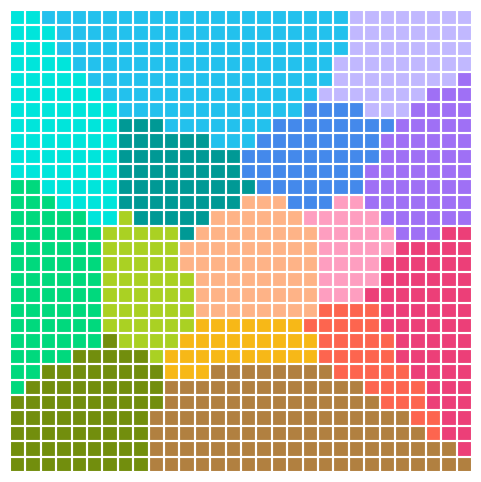

In [ ]:
args[9] = 1
evaluate()

17


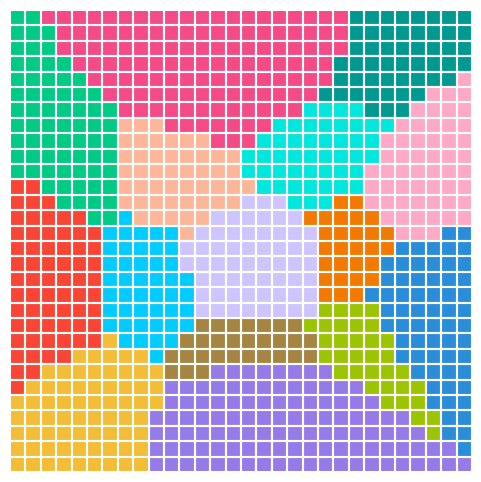

In [29]:
args[9] = 0
evaluate()